# Codes (Summary at last cell)

In [1]:
import scipy.io
mat = scipy.io.loadmat('proj2_data.mat')
print(mat.keys())

column=[]
for i, key in enumerate(mat.keys()):
    column.append(mat[key])
    i+=1

Population = column[3] # Individual with gene
beta = column[4] # Gene with ancestor

dict_keys(['__header__', '__version__', '__globals__', 'data', 'beta_matrix'])


In [2]:
# Alpha = 0.1

import numpy as np
from scipy.special import digamma
from time import time

def normalized(phi):
    row_sum = phi.sum(axis=1)
    for i in range(len(row_sum)):
        phi[i,:] = phi[i,:]/row_sum[i]
    return phi

iterations = np.zeros((100))
gammas = np.zeros((100,4))
time_taken = np.zeros((100))

for ind in range(Population.shape[0]):
    t = time()
    Individual = Population[ind]
    index = np.where(Individual!=0)[0]    
    N = Individual.sum()
    index = np.where(Individual!=0)[0]
    index_list = []
    for num in index:
        temp = [num]*Individual[num]
        for temp_i in temp:
            index_list.append(temp_i)
    k = 4
    alpha = 0.1

    phi = np.ones((N,k))/k
    gamma = alpha + np.ones((k))*N/k

    iteration = 0
    eps = 1e-3
    error = 1

    while error >= eps:
        phi_old = phi
        gamme_old = gamma
        for n in range(N):
            for i in range(k):
                phi[n,i] = beta[index_list[n],i]*np.exp(digamma(gamma[i]))
            phi = normalized(phi)
        gamma = alpha + phi.sum(axis=0)
        err1 = np.max(abs(gamma - gamme_old))
        err2 = np.max(abs(phi - phi_old))
        error = max(err1,err2)
        iteration += 1
    
    if ind == 0:
        phi1 = phi
    print('Individual: {}, Iter: {}, Time taken: {}'.format(ind,iteration,time()-t))
    time_taken[ind] = time()-t
    iterations[ind] = iteration
    gammas[ind,:] = gamma
    
print('Total time taken: {}'.format(time_taken.sum()))


iterations01 = iterations
time_taken01 = time_taken
theta01 = gammas
print('Theta.out (alpha = 0.1):\n',theta01)

Individual: 0, Iter: 70, Time taken: 1.3416073322296143
Individual: 1, Iter: 35, Time taken: 0.5825905799865723
Individual: 2, Iter: 71, Time taken: 0.7632794380187988
Individual: 3, Iter: 148, Time taken: 1.969858169555664
Individual: 4, Iter: 351, Time taken: 1.8376929759979248
Individual: 5, Iter: 42, Time taken: 0.974694013595581
Individual: 6, Iter: 55, Time taken: 0.7654764652252197
Individual: 7, Iter: 50, Time taken: 0.6632866859436035
Individual: 8, Iter: 44, Time taken: 0.6337723731994629
Individual: 9, Iter: 139, Time taken: 1.9528863430023193
Individual: 10, Iter: 74, Time taken: 0.8589999675750732
Individual: 11, Iter: 34, Time taken: 0.6442499160766602
Individual: 12, Iter: 31, Time taken: 0.4493410587310791
Individual: 13, Iter: 35, Time taken: 0.9680037498474121
Individual: 14, Iter: 50, Time taken: 1.2165398597717285
Individual: 15, Iter: 41, Time taken: 0.45973873138427734
Individual: 16, Iter: 46, Time taken: 0.7412583827972412
Individual: 17, Iter: 55, Time taken: 1

In [4]:
# For question 2 and 3
np.save("phi1.out", phi1)
np.save("Theta.out", theta01)

In [5]:
# Alpha = 0.01
import numpy as np
from scipy.special import digamma
from time import time

def normalized(phi):
    row_sum = phi.sum(axis=1)
    for i in range(len(row_sum)):
        phi[i,:] = phi[i,:]/row_sum[i]
    return phi

iterations = np.zeros((100))
gammas = np.zeros((100,4))
time_taken = np.zeros((100))

for ind in range(Population.shape[0]):
    t = time()
    Individual = Population[ind]
    index = np.where(Individual!=0)[0]    
    N = Individual.sum()
    index = np.where(Individual!=0)[0]
    index_list = []
    for num in index:
        temp = [num]*Individual[num]
        for temp_i in temp:
            index_list.append(temp_i)
    k = 4
    alpha = 0.01

    phi = np.ones((N,k))/k
    gamma = alpha + np.ones((k))*N/k

    iteration = 0
    eps = 1e-3
    error = 1

    while error >= eps:
        phi_old = phi
        gamme_old = gamma
        for n in range(N):
            for i in range(k):
                phi[n,i] = beta[index_list[n],i]*np.exp(digamma(gamma[i]))
            phi = normalized(phi)
        gamma = alpha + phi.sum(axis=0)
        err1 = np.max(abs(gamma - gamme_old))
        err2 = np.max(abs(phi - phi_old))
        error = max(err1,err2)
        iteration += 1
    
    if ind == 0:
        phi1 = phi
    print('Individual: {}, Iter: {}, Time taken: {}'.format(ind,iteration,time()-t))
    time_taken[ind] = time()-t
    iterations[ind] = iteration
    gammas[ind,:] = gamma
print('Total time taken: {}'.format(time_taken.sum()))

iterations001 = iterations
time_taken001 = time_taken
theta001 = gammas
print('Theta.out (alpha = 0.01):\n',theta001)

Individual: 0, Iter: 88, Time taken: 1.7175841331481934
Individual: 1, Iter: 34, Time taken: 0.5899131298065186
Individual: 2, Iter: 130, Time taken: 1.6089329719543457
Individual: 3, Iter: 108, Time taken: 1.6014304161071777
Individual: 4, Iter: 55, Time taken: 0.3152339458465576
Individual: 5, Iter: 43, Time taken: 1.0221612453460693
Individual: 6, Iter: 51, Time taken: 0.736595630645752
Individual: 7, Iter: 46, Time taken: 0.6244320869445801
Individual: 8, Iter: 48, Time taken: 0.5987443923950195
Individual: 9, Iter: 118, Time taken: 1.6355400085449219
Individual: 10, Iter: 67, Time taken: 0.7720155715942383
Individual: 11, Iter: 37, Time taken: 0.7450923919677734
Individual: 12, Iter: 31, Time taken: 0.4434490203857422
Individual: 13, Iter: 34, Time taken: 0.8702616691589355
Individual: 14, Iter: 46, Time taken: 1.059169054031372
Individual: 15, Iter: 42, Time taken: 0.4979405403137207
Individual: 16, Iter: 55, Time taken: 0.805525541305542
Individual: 17, Iter: 61, Time taken: 1.2

In [6]:
# Alpha = 1
import numpy as np
from scipy.special import digamma
from time import time

def normalized(phi):
    row_sum = phi.sum(axis=1)
    for i in range(len(row_sum)):
        phi[i,:] = phi[i,:]/row_sum[i]
    return phi

iterations = np.zeros((100))
gammas = np.zeros((100,4))
time_taken = np.zeros((100))

for ind in range(Population.shape[0]):
    t = time()
    Individual = Population[ind]
    index = np.where(Individual!=0)[0]    
    N = Individual.sum()
    index = np.where(Individual!=0)[0]
    index_list = []
    for num in index:
        temp = [num]*Individual[num]
        for temp_i in temp:
            index_list.append(temp_i)
    k = 4
    alpha = 1

    phi = np.ones((N,k))/k
    gamma = alpha + np.ones((k))*N/k

    iteration = 0
    eps = 1e-3
    error = 1

    while error >= eps:
        phi_old = phi
        gamme_old = gamma
        for n in range(N):
            for i in range(k):
                phi[n,i] = beta[index_list[n],i]*np.exp(digamma(gamma[i]))
            phi = normalized(phi)
        gamma = alpha + phi.sum(axis=0)
        err1 = np.max(abs(gamma - gamme_old))
        err2 = np.max(abs(phi - phi_old))
        error = max(err1,err2)
        iteration += 1
    
    if ind == 0:
        phi1 = phi
    print('Individual: {}, Iter: {}, Time taken: {}'.format(ind,iteration,time()-t))
    time_taken[ind] = time()-t
    iterations[ind] = iteration
    gammas[ind,:] = gamma
print('Total time taken: {}'.format(time_taken.sum()))

iterations1 = iterations
time_taken1 = time_taken
theta1 = gammas
print('Theta.out (alpha = 1):\n',theta1)

Individual: 0, Iter: 38, Time taken: 0.7438645362854004
Individual: 1, Iter: 42, Time taken: 0.7348833084106445
Individual: 2, Iter: 41, Time taken: 0.4944119453430176
Individual: 3, Iter: 38, Time taken: 0.5327212810516357
Individual: 4, Iter: 31, Time taken: 0.16582107543945312
Individual: 5, Iter: 32, Time taken: 0.7912137508392334
Individual: 6, Iter: 39, Time taken: 0.5883429050445557
Individual: 7, Iter: 33, Time taken: 0.43282127380371094
Individual: 8, Iter: 29, Time taken: 0.39785337448120117
Individual: 9, Iter: 44, Time taken: 0.5803565979003906
Individual: 10, Iter: 33, Time taken: 0.3522310256958008
Individual: 11, Iter: 39, Time taken: 0.7510602474212646
Individual: 12, Iter: 32, Time taken: 0.45703864097595215
Individual: 13, Iter: 37, Time taken: 0.9692614078521729
Individual: 14, Iter: 46, Time taken: 1.0275135040283203
Individual: 15, Iter: 33, Time taken: 0.35874509811401367
Individual: 16, Iter: 32, Time taken: 0.4996485710144043
Individual: 17, Iter: 34, Time taken

In [7]:
# Alpha = 10
import numpy as np
from scipy.special import digamma
from time import time

def normalized(phi):
    row_sum = phi.sum(axis=1)
    for i in range(len(row_sum)):
        phi[i,:] = phi[i,:]/row_sum[i]
    return phi

iterations = np.zeros((100))
gammas = np.zeros((100,4))
time_taken = np.zeros((100))

for ind in range(Population.shape[0]):
    t = time()
    Individual = Population[ind]
    index = np.where(Individual!=0)[0]    
    N = Individual.sum()
    index = np.where(Individual!=0)[0]
    index_list = []
    for num in index:
        temp = [num]*Individual[num]
        for temp_i in temp:
            index_list.append(temp_i)
    k = 4
    alpha = 10

    phi = np.ones((N,k))/k
    gamma = alpha + np.ones((k))*N/k

    iteration = 0
    eps = 1e-3
    error = 1

    while error >= eps:
        phi_old = phi
        gamme_old = gamma
        for n in range(N):
            for i in range(k):
                phi[n,i] = beta[index_list[n],i]*np.exp(digamma(gamma[i]))
            phi = normalized(phi)
        gamma = alpha + phi.sum(axis=0)
        err1 = np.max(abs(gamma - gamme_old))
        err2 = np.max(abs(phi - phi_old))
        error = max(err1,err2)
        iteration += 1
    
    if ind == 0:
        phi1 = phi
    print('Individual: {}, Iter: {}, Time taken: {}'.format(ind,iteration,time()-t))
    time_taken[ind] = time()-t
    iterations[ind] = iteration
    gammas[ind,:] = gamma
print('Total time taken: {}'.format(time_taken.sum()))

iterations10 = iterations
time_taken10 = time_taken
theta10 = gammas
print('Theta.out (alpha = 10):\n',theta10)

Individual: 0, Iter: 16, Time taken: 0.35294318199157715
Individual: 1, Iter: 16, Time taken: 0.3278377056121826
Individual: 2, Iter: 13, Time taken: 0.16990089416503906
Individual: 3, Iter: 16, Time taken: 0.23589396476745605
Individual: 4, Iter: 14, Time taken: 0.0781097412109375
Individual: 5, Iter: 18, Time taken: 0.47634124755859375
Individual: 6, Iter: 17, Time taken: 0.2792956829071045
Individual: 7, Iter: 15, Time taken: 0.22935914993286133
Individual: 8, Iter: 13, Time taken: 0.17009949684143066
Individual: 9, Iter: 17, Time taken: 0.2503046989440918
Individual: 10, Iter: 15, Time taken: 0.2014758586883545
Individual: 11, Iter: 18, Time taken: 0.379213809967041
Individual: 12, Iter: 16, Time taken: 0.26001620292663574
Individual: 13, Iter: 17, Time taken: 0.45957231521606445
Individual: 14, Iter: 19, Time taken: 0.46265673637390137
Individual: 15, Iter: 16, Time taken: 0.19553780555725098
Individual: 16, Iter: 16, Time taken: 0.26732873916625977
Individual: 17, Iter: 18, Time 

# Summary

In [14]:
print("Iterations for alpha = 0.1: \n{}\nIterations for alpha = 0.01: \n{}\nIterations for alpha = 1: \n{}\nIterations for alpha = 10: \n{}\n"
      .format(iterations01.sum(),iterations001.sum(),iterations1.sum(),iterations10.sum()))
print("Iterations for alpha = 0.1: \n{}\nIterations for alpha = 0.01: \n{}\nIterations for alpha = 1: \n{}\nIterations for alpha = 10: \n{}\n"
      .format(time_taken01.sum(),time_taken001.sum(),time_taken1.sum(),time_taken10.sum()))

Iterations for alpha = 0.1: 
5935.0
Iterations for alpha = 0.01: 
6044.0
Iterations for alpha = 1: 
3434.0
Iterations for alpha = 10: 
1516.0

Iterations for alpha = 0.1: 
92.31220650672913
Iterations for alpha = 0.01: 
97.31049036979675
Iterations for alpha = 1: 
58.54522776603699
Iterations for alpha = 10: 
26.77246642112732



(0, 80)

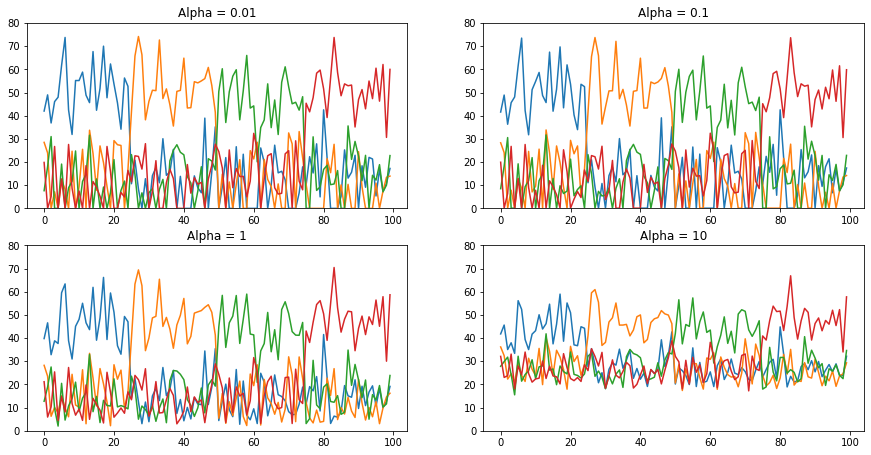

In [34]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,7.5))
plt.subplot(2,2,2)
plt.title('Alpha = 0.1')
plt.plot(theta01)
plt.ylim(0, 80)
plt.subplot(2,2,1)
plt.title('Alpha = 0.01')
plt.plot(theta001)
plt.ylim(0, 80)
plt.subplot(2,2,3)
plt.title('Alpha = 1')
plt.plot(theta1)
plt.ylim(0, 80)
plt.subplot(2,2,4)
plt.title('Alpha = 10')
plt.plot(theta10)
plt.ylim(0, 80)